# Decision Tree

>Decision Tree is a Supervised learning technique,mostly it is preferred for solving the binary or multiclass problems.

>It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each   leaf node represents the outcome or prediction

>Its shows like tree

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier,plot_tree
import matplotlib.pyplot as plt

In [2]:
iris=load_iris()
X=iris.data
y=iris.target

In [3]:
model=DecisionTreeClassifier()
model.fit(X,y)

DecisionTreeClassifier()

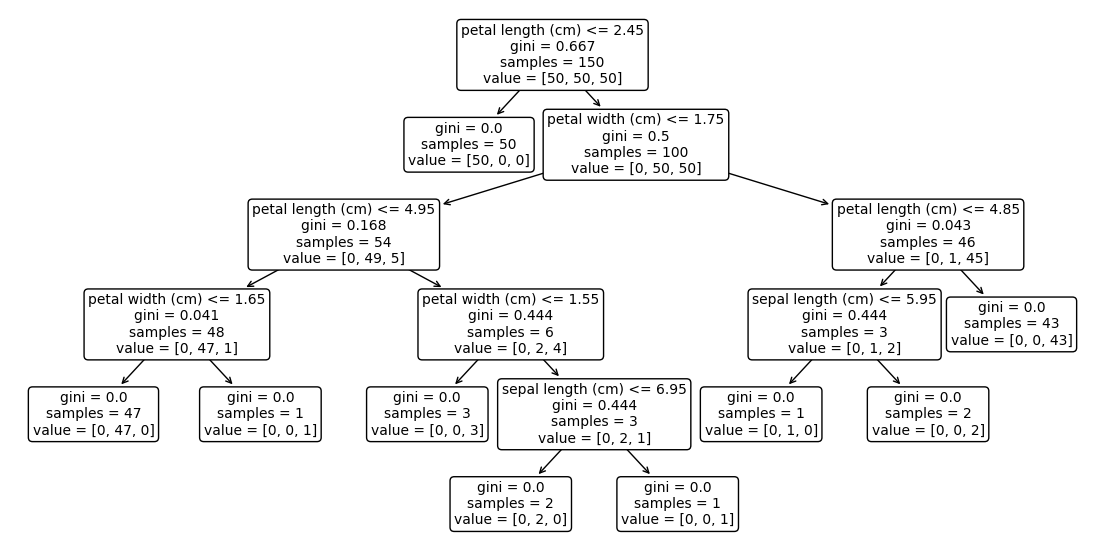

In [4]:
plt.figure(figsize=(14,7))
plot_tree(model,fontsize=10,rounded=True,feature_names=iris.feature_names)
plt.show()

In [5]:
sample=[2.5,1.5,5.5,.5]
model.predict([sample])

array([2])

In [6]:
sample=[2.5,1.5,5.5,1.5]
model.predict([sample])

array([2])

# prunning 

is a process to avoid the overfitting in tree

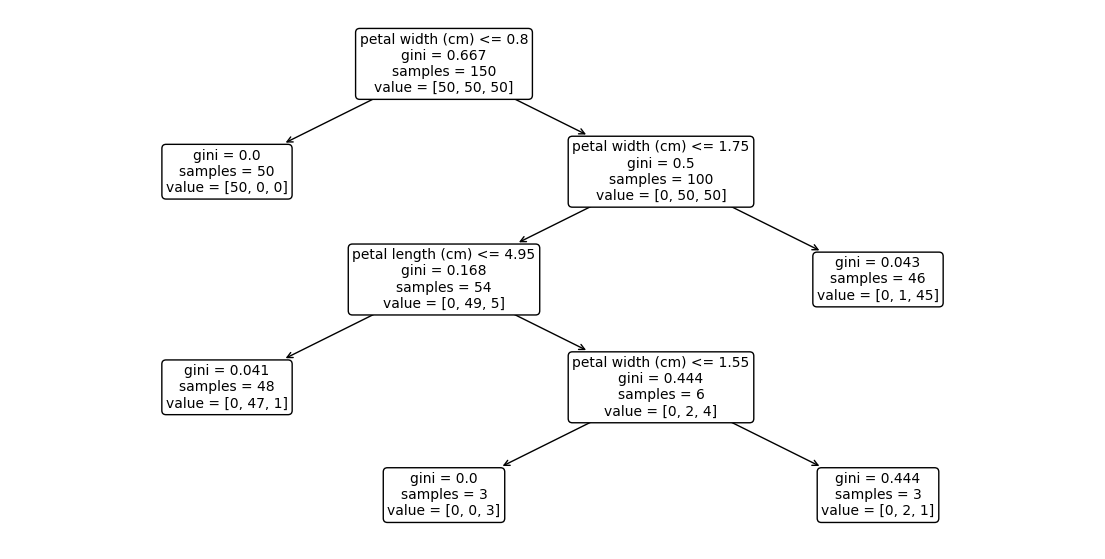

In [7]:
model=DecisionTreeClassifier(criterion='gini',max_depth=4,min_samples_split=5,min_samples_leaf=3,max_leaf_nodes=5)
model.fit(X,y)
plt.figure(figsize=(14,7))
plot_tree(model,fontsize=10,rounded=True,feature_names=iris.feature_names)
plt.show()

# Decision tree with regression

In [8]:
import pandas as pd

In [9]:
df=pd.read_csv('salaray_projects.csv')
df

,YearsExperience,Projects,Salary
0,1.1,1,39343
1,1.3,2,46205
2,1.5,3,37731
3,2.0,4,43525
4,2.2,5,39891
5,2.9,6,56642
6,3.0,7,60150
7,3.2,8,54445
8,3.2,9,64445
9,3.7,10,57189


In [10]:
X=df.iloc[:10,:-1].values
y=df.iloc[:10,-1].values

In [11]:
from sklearn.tree import DecisionTreeRegressor

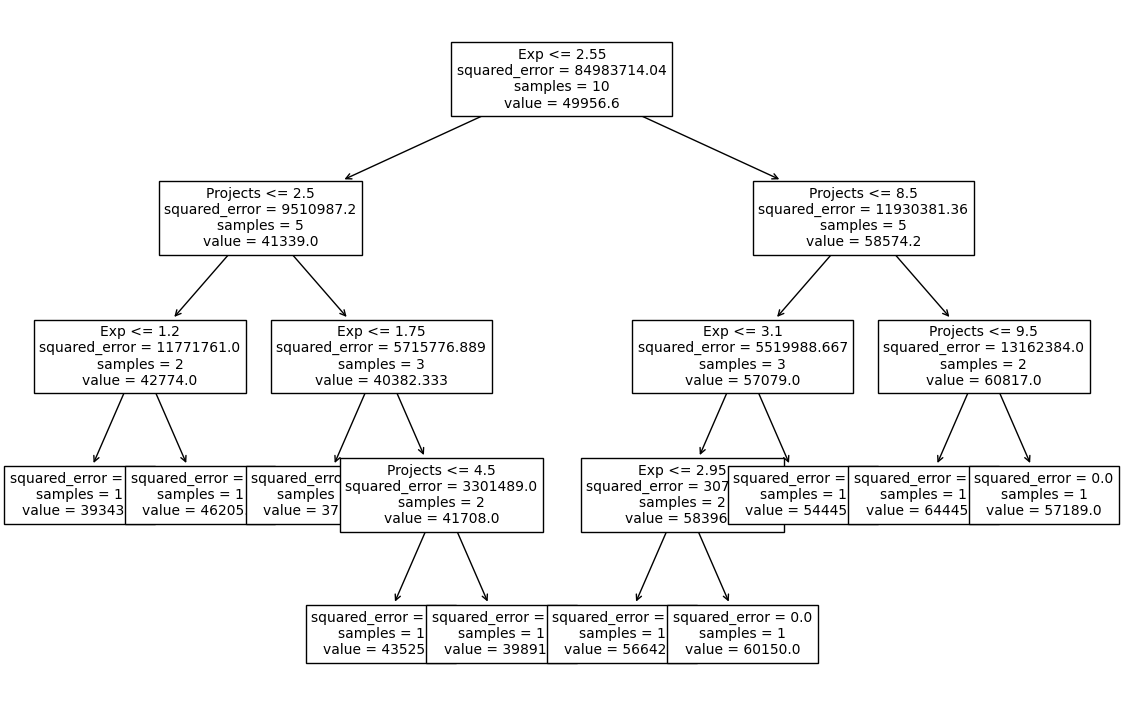

In [12]:
model=DecisionTreeRegressor()
model.fit(X,y)

plt.figure(figsize=(14,9))
plot_tree(model,fontsize=10,feature_names=['Exp','Projects'])
plt.show()

In [13]:
y.mean()

49956.6

In [14]:
model.predict([[4.5,3],[10,25],[11,35]])

array([54445., 57189., 57189.])

# Ensemble(group)  technique/method

 > Ensemble learning is clubbing of multiple weak learners and then using aggregation for result prediction. 
 
 > combining predictions of multiple weeks learners/models to make final prediction

There are following algorithms that work on this technique
 > Random forest/ Regressor
 
 > BaggingClassifier / Regressor
 
 > AdaboostClasssifier /Regressor
 
 > VotingClassifier/ Regressor

# how ensemble makes subset for weak models
> bagging/ bootstrap subset    (RandomForest,Bagging)

>boosting subset               (Adaboost)

>copy                          (Votingclf)

# RandomForestClassifier

> overfitting solve by RandomForestClassifier

> Disadvantage: expensive (because of taking time for subset )
               Computationally expensive

In [15]:
from sklearn.datasets import load_iris 
from sklearn.ensemble import RandomForestClassifier

In [16]:
iris=load_iris()

In [19]:
X=iris.data
y=iris.target

In [20]:
model=RandomForestClassifier(n_estimators=3)
model.fit(X,y)
model.predict([[3.2,1.1,5.6,.6]])

array([0])

# BaggingClassifier
> when we want to use specific agorithm for model training 

In [21]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [22]:
weak_model=KNeighborsClassifier()
model=BaggingClassifier(n_estimators=3,estimator=weak_model)
model.fit(X,y)

BaggingClassifier(estimator=KNeighborsClassifier(), n_estimators=3)

In [23]:
model.predict([[3.5,1.1,5.5,.6]])

array([1])

In [24]:
from sklearn.linear_model import LogisticRegression
weak_model=LogisticRegression(max_iter=150)
model=BaggingClassifier(n_estimators=3,estimator=weak_model)
model.fit(X,y)
model.predict([[3.5,1.1,5.5,.6]])

array([1])

## When we want to train our different models with different algorithms

# VotingClassification

In [25]:
from sklearn.ensemble import VotingClassifier

In [29]:
wk1=KNeighborsClassifier()
wk2=LogisticRegression(multi_class='ovr',max_iter=150)
wk3=LogisticRegression(multi_class='multinomial',max_iter=150)
model=VotingClassifier([('m1',wk1),('m2',wk2),('m3',wk3)],voting='hard')
model.fit(X,y)

VotingClassifier(estimators=[('m1', KNeighborsClassifier()),
                             ('m2',
                              LogisticRegression(max_iter=150,
                                                 multi_class='ovr')),
                             ('m3',
                              LogisticRegression(max_iter=150,
                                                 multi_class='multinomial'))])

In [27]:
model.predict([[2.5,1.1,5.5,.5]])

array([1])

# Boosting technique

# Adaboost (Adaptive Boosting )

In [32]:
from sklearn.ensemble import AdaBoostClassifier

In [33]:
model=AdaBoostClassifier()
model.fit(X,y)
model.predict([[2.1,1.1,5.4,.2]])

array([1])